In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV, StratifiedKFold
from scipy import interp
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score ,roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest
%matplotlib inline

# Importing the data file

In [3]:
File_Name = "DataDNA.csv"
df = pd.read_csv(File_Name, sep = ',')
df.head()

,1,2,1.1,2.1,1.2,2.2,3,3.1,3.2,3.3,...,3.8,2.19,3.9,4.6,2.20,2.21,2.22,2.23,1.15,1.16
0,3,3,4,2,1,2,2,4,3,2,...,1,4,3,4,4,4,1,3,4,1
1,4,1,4,4,4,4,1,1,2,1,...,1,2,1,1,4,2,2,4,4,1
2,1,4,1,1,3,3,4,4,3,4,...,1,3,3,4,1,3,3,4,2,-1
3,3,4,4,3,1,1,4,4,4,1,...,3,1,3,2,1,4,2,1,1,-1
4,3,2,3,1,2,3,4,3,1,4,...,2,2,2,3,4,2,2,2,2,-1


---

# Preprocessing the Data:

Renaming the Target column

In [4]:
new_columns=df.columns.values
new_columns[-1]='target'
df.columns=new_columns
df.columns

Index(['1', '2', '1.1', '2.1', '1.2', '2.2', '3', '3.1', '3.2', '3.3', '1.3',
       '2.3', '1.4', '3.4', '4', '2.4', '1.5', '2.5', '2.6', '2.7', '1.6',
       '1.7', '2.8', '3.5', '1.8', '4.1', '2.9', '2.10', '1.9', '4.2', '2.11',
       '2.12', '1.10', '4.3', '2.13', '2.14', '1.11', '2.15', '1.12', '1.13',
       '2.16', '2.17', '1.14', '4.4', '2.18', '3.6', '3.7', '4.5', '3.8',
       '2.19', '3.9', '4.6', '2.20', '2.21', '2.22', '2.23', '1.15', 'target'],
      dtype='object')

In [5]:
df.shape

(2199, 58)

## Checking for missing values:

In [6]:
df.isnull().sum()

1         0
2         0
1.1       0
2.1       0
1.2       0
2.2       0
3         0
3.1       0
3.2       0
3.3       0
1.3       0
2.3       0
1.4       0
3.4       0
4         0
2.4       0
1.5       0
2.5       0
2.6       0
2.7       0
1.6       0
1.7       0
2.8       0
3.5       0
1.8       0
4.1       0
2.9       0
2.10      0
1.9       0
4.2       0
2.11      0
2.12      0
1.10      0
4.3       0
2.13      0
2.14      0
1.11      0
2.15      0
1.12      0
1.13      0
2.16      0
2.17      0
1.14      0
4.4       0
2.18      0
3.6       0
3.7       0
4.5       0
3.8       0
2.19      0
3.9       0
4.6       0
2.20      0
2.21      0
2.22      0
2.23      0
1.15      0
target    0
dtype: int64

## Checking for outliers:


To find outliers the Tukey oultier labeling is applied. If a value lies below the first quartile or above the third quartile by more than 1.5 times the interquartile range, it will be considered an outlier.

In [7]:
up_o=[]
low_o=[]
x=df.describe()
IQR=x.values[6,:]-x.values[4,:] #Interquartile range of each feature
upper_limit=x.values[6,:]+1.5*IQR
lower_limit=x.values[4,:]-1.5*IQR
for i in range(58):
    upper_outlier=( (df.iloc[:,i] > upper_limit[i]))
    lower_outlier=( (df.iloc[:,i] < lower_limit[i]))
    up_o.append(upper_outlier)
    low_o.append(lower_outlier)

In [8]:
low_outdf=pd.DataFrame(low_o)
up_outdf=pd.DataFrame(up_o)
print('Total percentage of found outliers: ',(low_outdf[low_outdf==True].sum().sum()+up_outdf[up_outdf==True].sum().sum())*100/(df.shape[0]*df.shape[1]))

Total percentage of found outliers:  0.0


---

## Spliting the data
Splitting the data into training and testing data randomly because we want to train our algorithm on 'training set' and then test its performance on a new data that has not been train for to get a sence of its performance on future data. we split the data randomly to get an unbiased data sets with assumption varialbes will be distributed the same way, so that the training data is a good estimate of testing data, and the testing data is a good estimate of future data, which not always the case if time is a important variable in our data.

In [9]:
X_train, X_test= train_test_split(df, test_size=0.25,random_state=101)
X_train.head()

,1,2,1.1,2.1,1.2,2.2,3,3.1,3.2,3.3,...,3.8,2.19,3.9,4.6,2.20,2.21,2.22,2.23,1.15,target
1002,2,3,2,2,4,4,3,4,2,3,...,3,3,3,3,2,1,1,3,3,-1
422,2,2,1,2,1,2,2,3,4,2,...,3,4,3,1,2,1,3,4,4,1
342,2,1,1,2,1,4,2,3,4,2,...,1,3,1,1,2,2,2,1,2,-1
2016,3,3,1,1,1,2,2,4,1,1,...,2,3,3,4,3,2,1,2,1,-1
1488,2,1,1,2,1,2,2,3,4,2,...,1,3,1,1,2,2,2,1,2,-1


## Normalizing the data using Z-Score normalization
Before applying our classification algorithms the data is normalized. Using distance based classifiers as kNN benefits from normalizations if we are trying to have all the features to contribute the same. The same argument is valied with SVM because we are trying to find the maximum seperation between classes to find the best seperator, not normalizing the features would result in some features not contributing like the rest. Also in NN some weight can updates fasters than other without normalization. However, Tree based classifier shouldn't have a big change since they use impurity test.
#### As for the choice of Z-Score over Min-max normalization, using min-max could 

In [10]:
scaler = StandardScaler()
col=df.columns

scaled_train=scaler.fit_transform(X_train)
X_train=pd.DataFrame(data=scaled_train, columns=col)
X_train[['target']] =0.026425+X_train[['target']]  # To change the labels back to -1 and 1 
X_train[['target']]= X_train[['target']].astype(int) 
scaled_test=scaler.transform(X_test)
X_test=pd.DataFrame(data=scaled_test, columns=col)
X_test[['target']] =0.026425+X_test[['target']]
X_test[['target']]= X_test[['target']].astype(int)

C:\Users\m94o\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\m94o\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\m94o\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


## KNN Classification

Evaluating and tuning the algorithm using 5-fold cross validation to find the best parameters for our knn classification algorithm.
The evaluating and tuning process cannot be done on the testing data to avoid creating an algorithm that would classify the testing data in optimal way 'by memorizing it' but cannot generalize on new data (overfitting). There for the training data will be devided into training into 5 parts and each time the algorithm will be trained on 4 of the 5 parts and tested on the remaining part, where the process is done changably 5 times (5 folds) and the score is reported for each time.
The cross validation strategy used here is stratified cross validation, where the folds are made by maintaining the percentage of samples in both classes. 

In [62]:
accuracy= []
cv = StratifiedKFold(n_splits=5)
for k in range(1,32,2):
    scores=[]
    knn = KNeighborsClassifier(n_neighbors=k)
    for train, test in cv.split(X_train.drop('target', axis =1 ), X_train[['target']]):
        score= knn.fit(X_train.drop('target', axis =1 ).iloc[train], X_train[['target']].iloc[train].values.ravel()).score(X_train.drop('target', axis =1 ).iloc[test],X_train[['target']].iloc[test])
        scores.append(score)
    accuracy.append(np.mean(scores))

Text(0, 0.5, 'Accuracy')

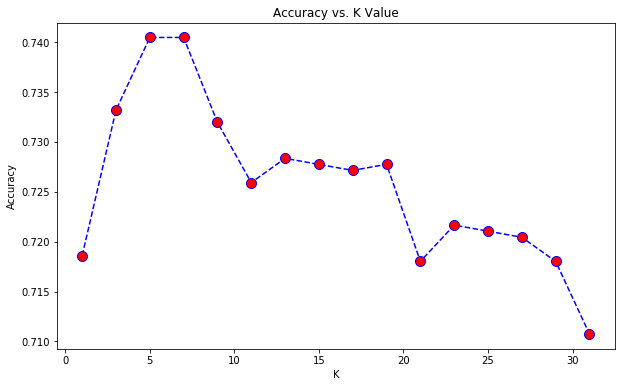

In [63]:
plt.figure(figsize=(10,6))
plt.plot(range(1,32,2),accuracy,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

After the evaluatoin process it is clear that using k=5 neighbors resulted in the best accuracy of 74%; therefore this value are going to be used for our classification. 

## SVM Classification

SVR with C= 0.1  , and gamma= 0.01
The average accuracy: 0.8423517983163158
The ROC curve: 


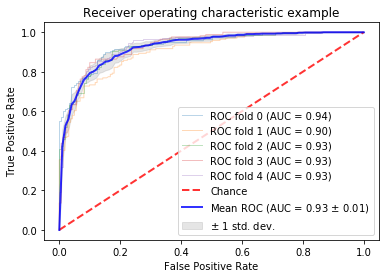

SVR with C= 0.1  , and gamma= 0.05
The average accuracy: 0.513038642701174
The ROC curve: 


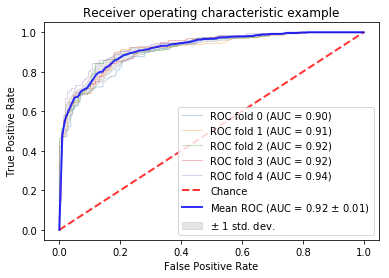

SVR with C= 0.1  , and gamma= 0.1
The average accuracy: 0.513038642701174
The ROC curve: 


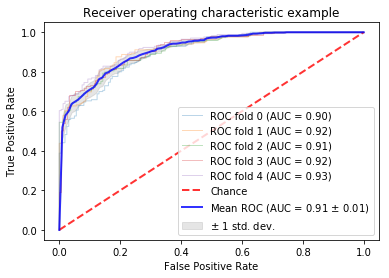

SVR with C= 0.1  , and gamma= 0.5
The average accuracy: 0.513038642701174
The ROC curve: 


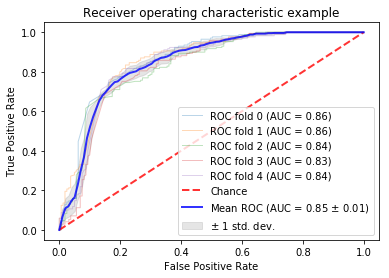

SVR with C= 0.1  , and gamma= 1
The average accuracy: 0.513038642701174
The ROC curve: 


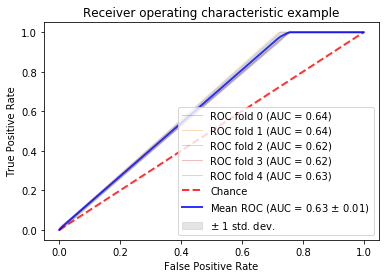

SVR with C= 0.1  , and gamma= 2
The average accuracy: 0.513038642701174
The ROC curve: 


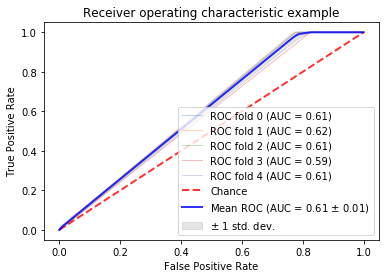

SVR with C= 0.1  , and gamma= 5
The average accuracy: 0.513038642701174
The ROC curve: 


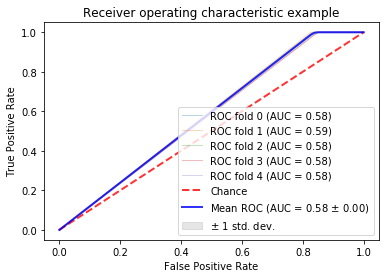

SVR with C= 0.1  , and gamma= 10
The average accuracy: 0.513038642701174
The ROC curve: 


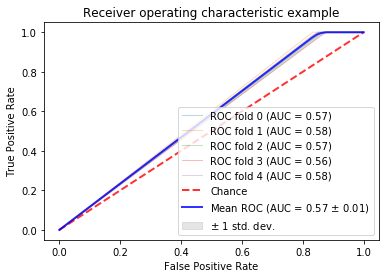

SVR with C= 0.5  , and gamma= 0.01
The average accuracy: 0.8653546697565467
The ROC curve: 


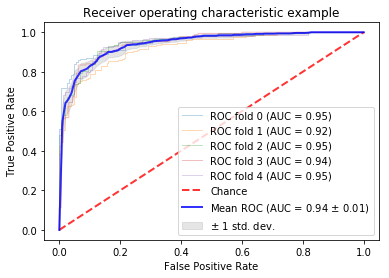

SVR with C= 0.5  , and gamma= 0.05
The average accuracy: 0.8016885537808595
The ROC curve: 


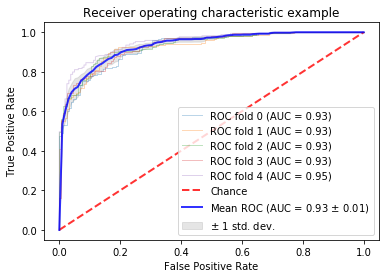

SVR with C= 0.5  , and gamma= 0.1
The average accuracy: 0.568813031368794
The ROC curve: 


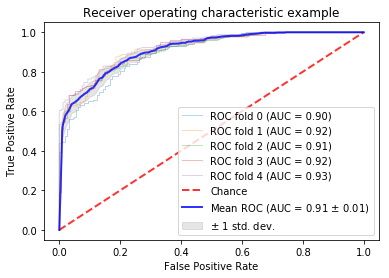

SVR with C= 0.5  , and gamma= 0.5
The average accuracy: 0.5306273397062109
The ROC curve: 


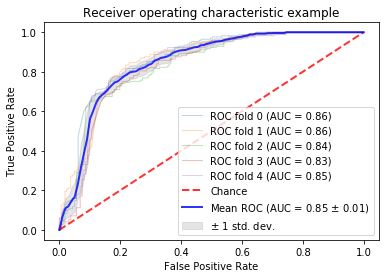

SVR with C= 0.5  , and gamma= 1
The average accuracy: 0.5282030972819685
The ROC curve: 


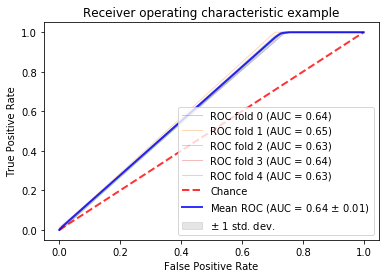

SVR with C= 0.5  , and gamma= 2
The average accuracy: 0.5245648803854114
The ROC curve: 


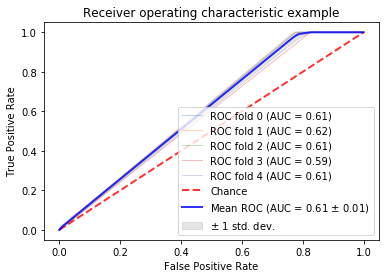

SVR with C= 0.5  , and gamma= 5
The average accuracy: 0.5221369537021655
The ROC curve: 


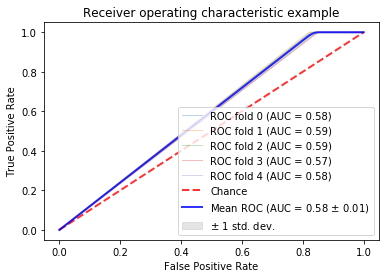

SVR with C= 0.5  , and gamma= 10
The average accuracy: 0.5221369537021655
The ROC curve: 


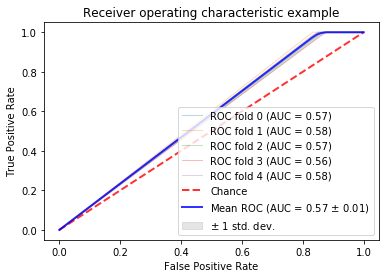

SVR with C= 1  , and gamma= 0.01
The average accuracy: 0.8756687639672791
The ROC curve: 


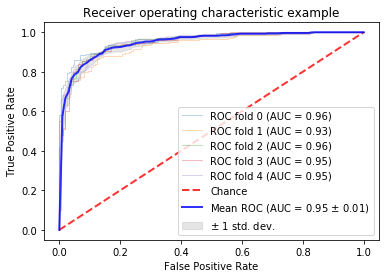

SVR with C= 1  , and gamma= 0.05
The average accuracy: 0.8538559304465327
The ROC curve: 


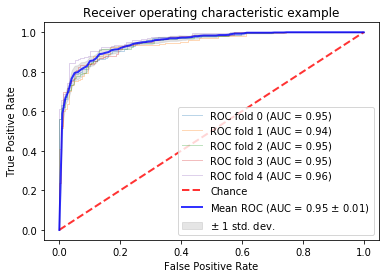

SVR with C= 1  , and gamma= 0.1
The average accuracy: 0.6409768907358416
The ROC curve: 


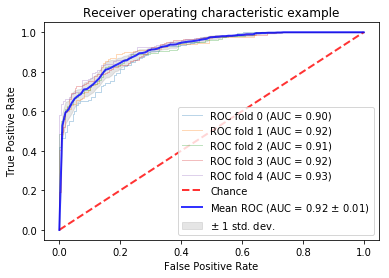

SVR with C= 1  , and gamma= 0.5
The average accuracy: 0.5845927460724658
The ROC curve: 


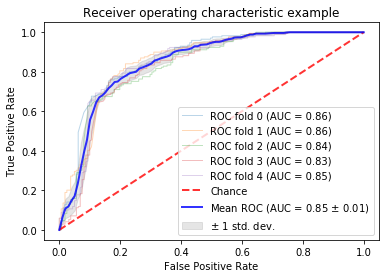

SVR with C= 1  , and gamma= 1
The average accuracy: 0.5821666615187218
The ROC curve: 


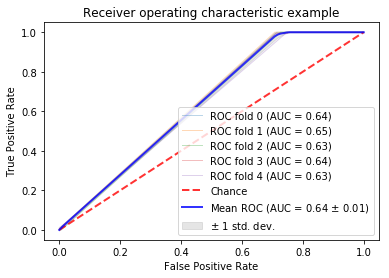

SVR with C= 1  , and gamma= 2
The average accuracy: 0.5761097063250434
The ROC curve: 


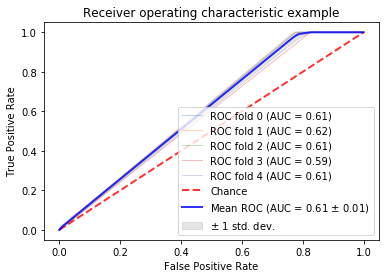

SVR with C= 1  , and gamma= 5
The average accuracy: 0.5658011162414325
The ROC curve: 


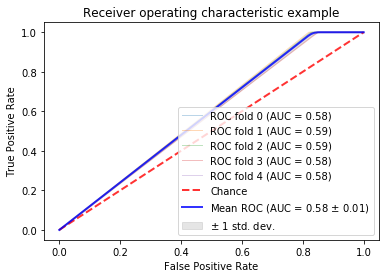

SVR with C= 1  , and gamma= 10
The average accuracy: 0.5658011162414325
The ROC curve: 


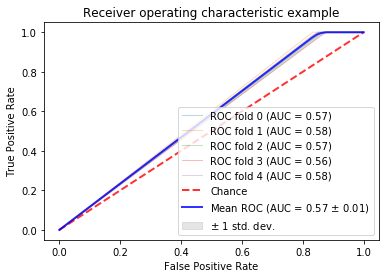

SVR with C= 2  , and gamma= 0.01
The average accuracy: 0.8877973779985735
The ROC curve: 


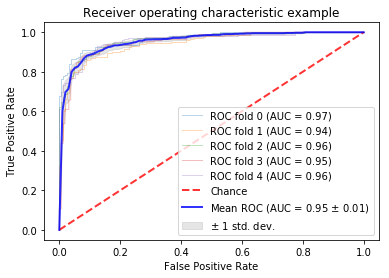

SVR with C= 2  , and gamma= 0.05
The average accuracy: 0.8623408234541486
The ROC curve: 


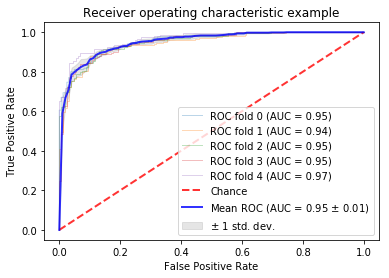

SVR with C= 2  , and gamma= 0.1
The average accuracy: 0.6737208539355483
The ROC curve: 


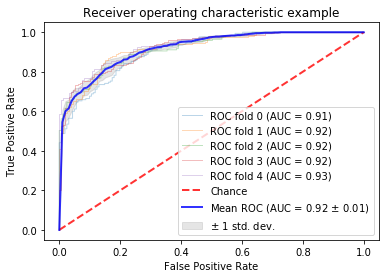

SVR with C= 2  , and gamma= 0.5
The average accuracy: 0.5864109278906477
The ROC curve: 


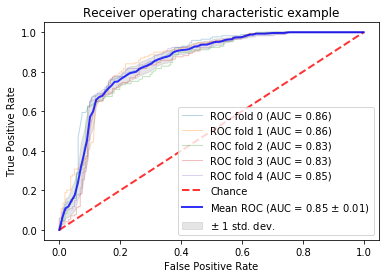

SVR with C= 2  , and gamma= 1
The average accuracy: 0.5833787827308429
The ROC curve: 


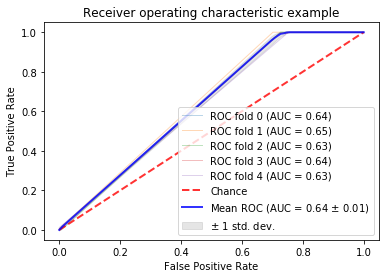

SVR with C= 2  , and gamma= 2
The average accuracy: 0.5767157669311042
The ROC curve: 


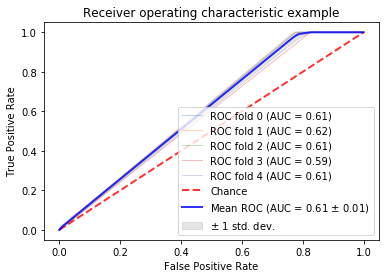

SVR with C= 2  , and gamma= 5
The average accuracy: 0.5658011162414325
The ROC curve: 


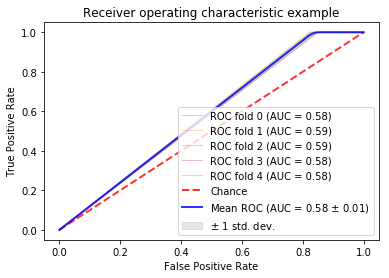

SVR with C= 2  , and gamma= 10
The average accuracy: 0.5658011162414325
The ROC curve: 


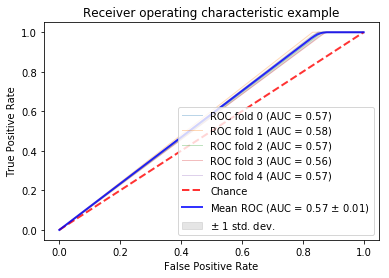

SVR with C= 5  , and gamma= 0.01
The average accuracy: 0.8944769507024442
The ROC curve: 


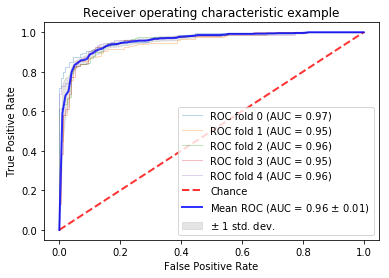

SVR with C= 5  , and gamma= 0.05
The average accuracy: 0.8623408234541486
The ROC curve: 


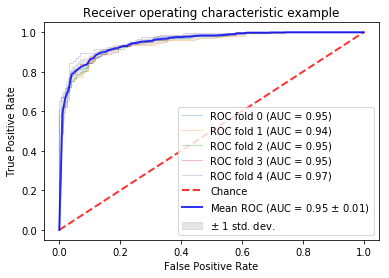

SVR with C= 5  , and gamma= 0.1
The average accuracy: 0.6737208539355483
The ROC curve: 


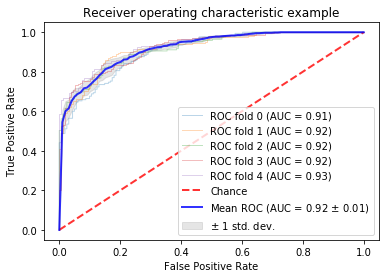

SVR with C= 5  , and gamma= 0.5
The average accuracy: 0.5864109278906477
The ROC curve: 


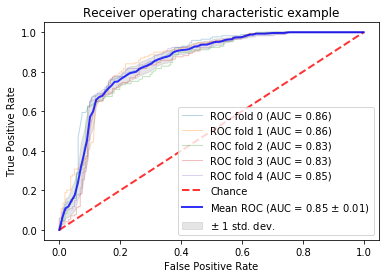

SVR with C= 5  , and gamma= 1
The average accuracy: 0.5833787827308429
The ROC curve: 


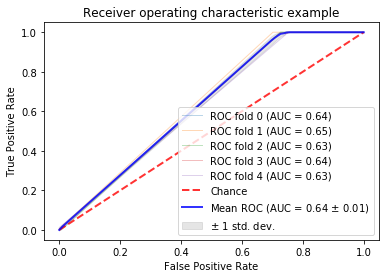

SVR with C= 5  , and gamma= 2
The average accuracy: 0.5767157669311042
The ROC curve: 


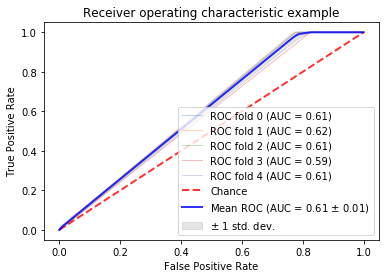

SVR with C= 5  , and gamma= 5
The average accuracy: 0.5658011162414325
The ROC curve: 


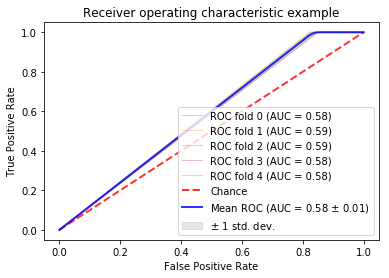

SVR with C= 5  , and gamma= 10
The average accuracy: 0.5658011162414325
The ROC curve: 


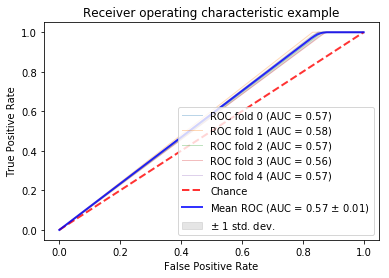

SVR with C= 10  , and gamma= 0.01
The average accuracy: 0.8950811803096947
The ROC curve: 


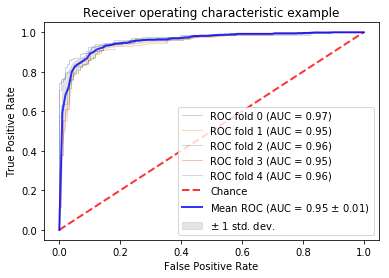

SVR with C= 10  , and gamma= 0.05
The average accuracy: 0.8623408234541486
The ROC curve: 


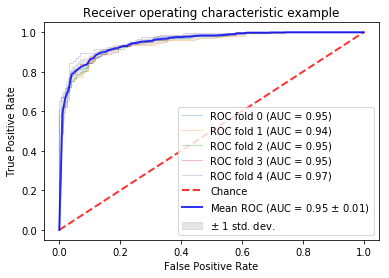

SVR with C= 10  , and gamma= 0.1
The average accuracy: 0.6737208539355483
The ROC curve: 


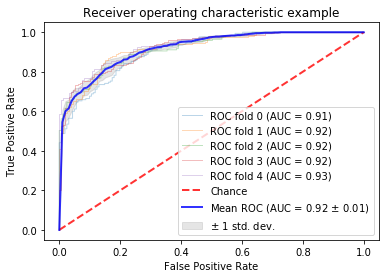

SVR with C= 10  , and gamma= 0.5
The average accuracy: 0.5864109278906477
The ROC curve: 


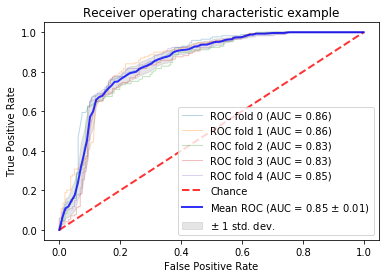

SVR with C= 10  , and gamma= 1
The average accuracy: 0.5833787827308429
The ROC curve: 


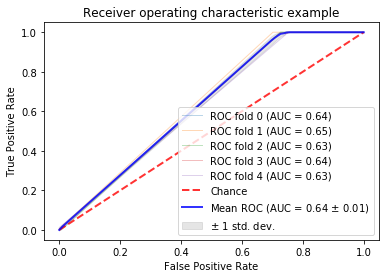

SVR with C= 10  , and gamma= 2
The average accuracy: 0.5767157669311042
The ROC curve: 


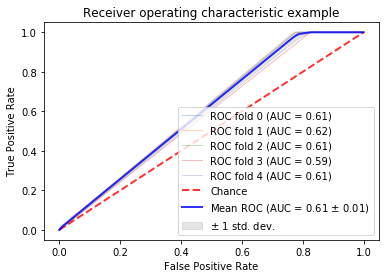

SVR with C= 10  , and gamma= 5
The average accuracy: 0.5658011162414325
The ROC curve: 


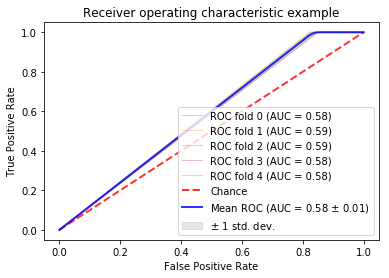

SVR with C= 10  , and gamma= 10
The average accuracy: 0.5658011162414325
The ROC curve: 


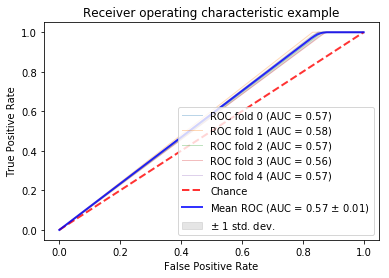

SVR with C= 20  , and gamma= 0.01
The average accuracy: 0.8926532424957572
The ROC curve: 


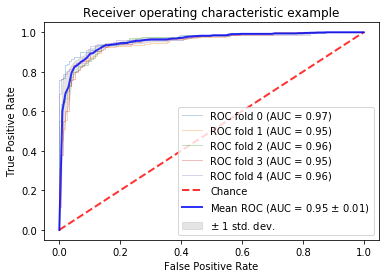

SVR with C= 20  , and gamma= 0.05
The average accuracy: 0.8623408234541486
The ROC curve: 


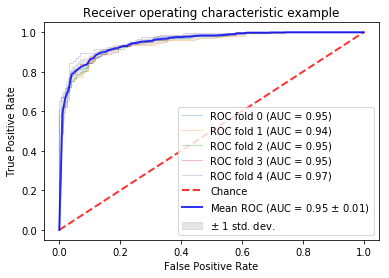

SVR with C= 20  , and gamma= 0.1
The average accuracy: 0.6737208539355483
The ROC curve: 


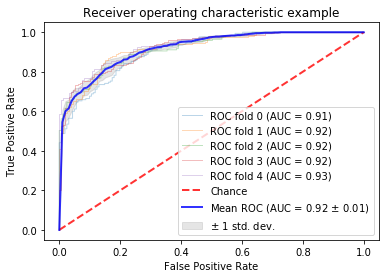

SVR with C= 20  , and gamma= 0.5
The average accuracy: 0.5864109278906477
The ROC curve: 


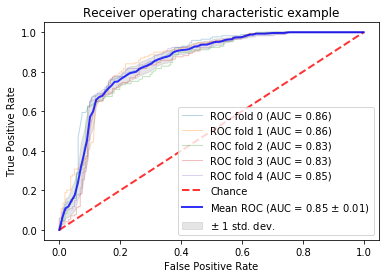

SVR with C= 20  , and gamma= 1
The average accuracy: 0.5833787827308429
The ROC curve: 


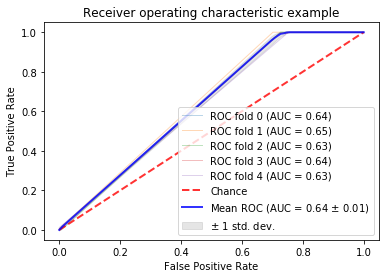

SVR with C= 20  , and gamma= 2
The average accuracy: 0.5767157669311042
The ROC curve: 


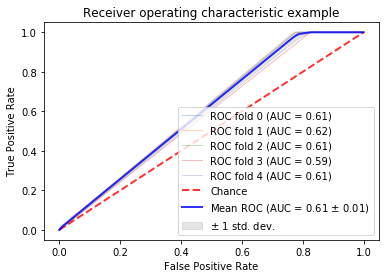

SVR with C= 20  , and gamma= 5
The average accuracy: 0.5658011162414325
The ROC curve: 


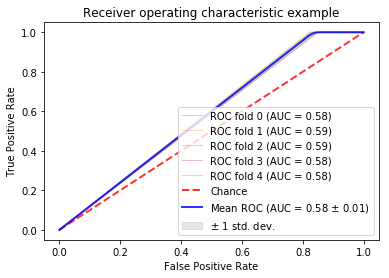

SVR with C= 20  , and gamma= 10
The average accuracy: 0.5658011162414325
The ROC curve: 


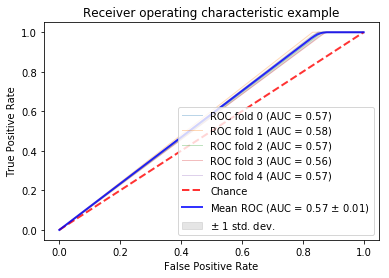

SVR with C= 50  , and gamma= 0.01
The average accuracy: 0.8926532424957572
The ROC curve: 


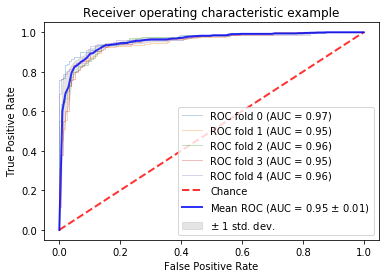

SVR with C= 50  , and gamma= 0.05
The average accuracy: 0.8623408234541486
The ROC curve: 


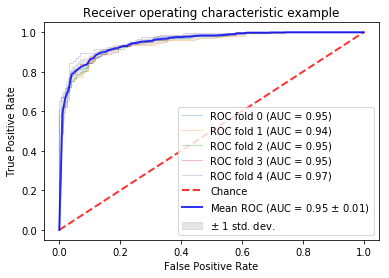

SVR with C= 50  , and gamma= 0.1
The average accuracy: 0.6737208539355483
The ROC curve: 


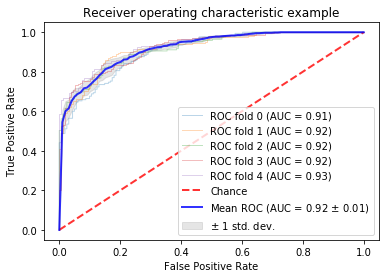

SVR with C= 50  , and gamma= 0.5
The average accuracy: 0.5864109278906477
The ROC curve: 


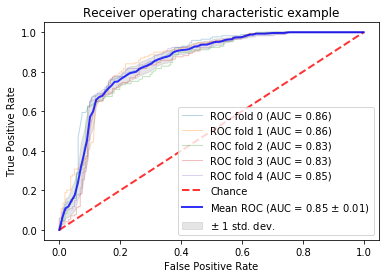

SVR with C= 50  , and gamma= 1
The average accuracy: 0.5833787827308429
The ROC curve: 


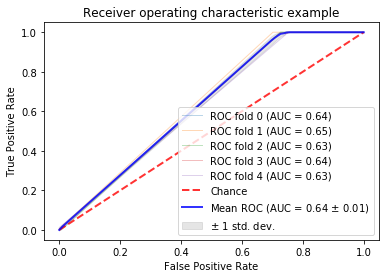

SVR with C= 50  , and gamma= 2
The average accuracy: 0.5767157669311042
The ROC curve: 


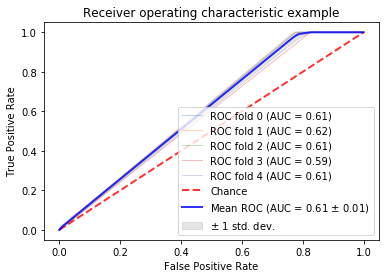

SVR with C= 50  , and gamma= 5
The average accuracy: 0.5658011162414325
The ROC curve: 


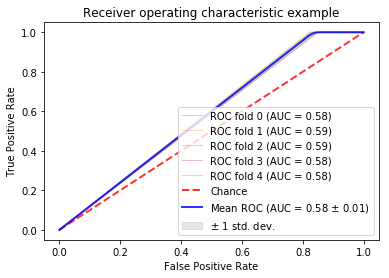

SVR with C= 50  , and gamma= 10
The average accuracy: 0.5658011162414325
The ROC curve: 


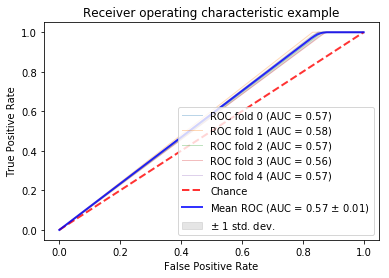

The best parameters in term of classification accuracy:
       C  gamma  average accuracy
40  10.0   0.01          0.895081


In [11]:
accuracy=pd.DataFrame({'C':[], 'gamma':[], 'average accuracy':[]})
for c in [0.1, 0.5, 1, 2, 5,
10, 20, 50]:
    for sigma in [0.01, 0.05, 0.1, 0.5, 1, 2, 5,
10]:
        
        
        cv = StratifiedKFold(n_splits=5)
        classifier = SVC(C=c ,kernel='rbf', gamma=sigma, probability=True,
                     random_state=25)

        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)
        
        i = 0
        scores=[]
        for train, test in cv.split(X_train.drop('target', axis =1 ), X_train[['target']]):
            probas_ = classifier.fit(X_train.drop('target', axis =1 ).iloc[train], X_train[['target']].iloc[train].values.ravel()).predict_proba(X_train.drop('target', axis =1 ).iloc[test])
            score=classifier.score(X_train.drop('target', axis =1 ).iloc[test],X_train[['target']].iloc[test])
            scores.append(score)
            # Compute ROC curve and area the curve
            fpr, tpr, thresholds = roc_curve(X_train[['target']].iloc[test], probas_[:, 1])
            tprs.append(interp(mean_fpr, fpr, tpr))
            tprs[-1][0] = 0.0
            roc_auc = auc(fpr, tpr)
            aucs.append(roc_auc)
            plt.plot(fpr, tpr, lw=1, alpha=0.3,
                     label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
            i += 1
        current_Accuracy=pd.DataFrame({'C':[c], 'gamma':[sigma], 'average accuracy':[np.mean(scores)]})
        accuracy=accuracy.append(current_Accuracy, ignore_index=True)
        print ('SVR with C=', c, ' , and gamma=', sigma)
        print ('The average accuracy:',np.mean(scores))
        print ('The ROC curve: ')
        plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
                 label='Chance', alpha=.8)
        
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        plt.plot(mean_fpr, mean_tpr, color='b',
                 label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
                 lw=2, alpha=.8)
        
        std_tpr = np.std(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                         label=r'$\pm$ 1 std. dev.')
        
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()
print('==============================================================')
print('The best parameters in term of classification accuracy:')
print (accuracy.iloc[accuracy[['average accuracy']].idxmax()])

After the evaluatoin process it is clear that using C=10 and gamma=0.01 resulted in the best accuracy of 89.51%; therefore these values are going to be used for our classification. 

## Training and Testing our models

### KNN Model

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train.drop('target', axis =1 ), X_train[['target']].values.ravel())
train_knn_score=knn.score(X_train.drop('target', axis =1 ),X_train[['target']])
test_knn_score=knn.score(X_test.drop('target', axis =1 ),X_test[['target']])
print ('Using KNN resulted in a training score = ', train_knn_score)
print ('and testing score= ', test_knn_score)

Using KNN resulted in a training score =  0.821710127349909
and testing score=  0.7436363636363637


### SVM model

In [19]:
classifier = SVC(C=10 ,kernel='rbf', gamma=0.01, probability=True, random_state=25)
classifier.fit(X_train.drop('target', axis =1 ), X_train[['target']].values.ravel())
train_knn_score=classifier.score(X_train.drop('target', axis =1 ),X_train[['target']])
test_knn_score=classifier.score(X_test.drop('target', axis =1 ),X_test[['target']])
print ('Using SVM resulted in a training score = ', train_knn_score)
print ('and testing score= ', test_knn_score)

Using SVM resulted in a training score =  1.0
and testing score=  0.9072727272727272


### Random Forest Model

In [21]:
clf = RandomForestClassifier()
clf.fit(X_train.drop('target', axis =1 ), X_train[['target']].values.ravel())
train_knn_score=clf.score(X_train.drop('target', axis =1 ),X_train[['target']])
test_knn_score=clf.score(X_test.drop('target', axis =1 ),X_test[['target']])
print ('Using Random Forest resulted in a training score = ', train_knn_score)
print ('and testing score= ', test_knn_score)

Using Random Forest resulted in a training score =  0.9981807155852032
and testing score=  0.9309090909090909


C:\Users\m94o\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Neural Networks Model

In [32]:
clf = MLPClassifier()
clf.fit(X_train.drop('target', axis =1 ), X_train[['target']].values.ravel())
train_knn_score=clf.score(X_train.drop('target', axis =1 ),X_train[['target']])
test_knn_score=clf.score(X_test.drop('target', axis =1 ),X_test[['target']])
print ('Using Neural Networks resulted in a training score = ', train_knn_score)
print ('and testing score= ', test_knn_score)

Using Neural Networks resulted in a training score =  1.0
and testing score=  0.9181818181818182


## 3.c 

### Tunned Random Forest Model

In [16]:
df[df[['target']].values!=-1].shape

(1136, 58)

In [21]:
Accuracy=pd.DataFrame({'max_depth':[], 'n_estimators': [], 'Average Accuracy':[]})
for max_d in [10, 15, 20, 30, 50,
None]:
    for n_est in [100, 500, 1000]:
        
        
        cv = StratifiedKFold(n_splits=5)
        classifier = RandomForestClassifier(n_estimators=n_est, max_depth=max_d , n_jobs=-1, random_state =25)

#         tprs = []
#         aucs = []
#         mean_fpr = np.linspace(0, 1, 100)
        
#         i = 0
        scores=[]
        for train, test in cv.split(X_train.drop(['target'], axis =1 ), X_train[['target']]):
#             probas_ = classifier.fit(X_train.drop(['target'], axis =1 ).iloc[train], X_train[['target']].iloc[train].values.ravel()).predict_proba(X_train.drop(['target'], axis =1 ).iloc[test])
            score=classifier.fit(X_train.drop(['target'], axis =1 ).iloc[train], X_train[['target']].iloc[train].values.ravel()).score(X_train.drop(['target'], axis =1 ).iloc[test],X_train[['target']].iloc[test])
            scores.append(score)
            # Compute ROC curve and area the curve
#             fpr, tpr, thresholds = roc_curve(X_train[['target']].iloc[test], probas_[:, 1])
#             tprs.append(interp(mean_fpr, fpr, tpr))
#             tprs[-1][0] = 0.0
#             roc_auc = auc(fpr, tpr)
#             aucs.append(roc_auc)
        
#             i += 1
#         mean_tpr = np.mean(tprs, axis=0)
#         mean_tpr[-1] = 1.0
#         mean_auc = auc(mean_fpr, mean_tpr)
        current_Accuracy=pd.DataFrame({'max_depth':[max_d], 'n_estimators': [n_est], 'Average Accuracy':[np.mean(scores)]})
        Accuracy=Accuracy.append(current_Accuracy,ignore_index = True)

print(Accuracy.iloc[Accuracy[['Average Accuracy']].idxmax()])        

   max_depth  n_estimators  Average Accuracy
1       10.0         500.0          0.967847


Evaluating the model

In [22]:
classifier = RandomForestClassifier(n_estimators=500, max_depth=10 , n_jobs=-1, random_state =25)
classifier.fit(X_train.drop(['target'], axis =1 ), X_train[['target']].values.ravel())
train_score=classifier.score(X_train.drop('target', axis =1 ),X_train[['target']])
test_score=classifier.score(X_test.drop('target', axis =1 ),X_test[['target']])
print ('Using Tunned Random Forest Model resulted in a training score = ', train_score)
print ('and testing score= ', test_score)

Using Tunned Random Forest Model resulted in a training score =  1.0
and testing score=  0.9709090909090909


### Tunned Neural Network Model

In [43]:
Accuracy=pd.DataFrame({'hidden_layer_sizes':[], 'solver': [], 'Average Accuracy':[]})
for hidden_layer_s in [100, 500]:
    for solv in ['adam', 'sgd', 'lbfgs']:
        
        
        cv = StratifiedKFold(n_splits=5)
        classifier =MLPClassifier(hidden_layer_sizes=hidden_layer_s, solver=solv, random_state=25)

#         tprs = []
#         aucs = []
#         mean_fpr = np.linspace(0, 1, 100)
        
#         i = 0
        scores=[]
        for train, test in cv.split(X_train.drop(['target'], axis =1 ), X_train[['target']]):
#             probas_ = classifier.fit(X_train.drop(['target'], axis =1 ).iloc[train], X_train[['target']].iloc[train].values.ravel()).predict_proba(X_train.drop(['target'], axis =1 ).iloc[test])
            score=classifier.fit(X_train.drop(['target'], axis =1 ).iloc[train], X_train[['target']].iloc[train].values.ravel()).score(X_train.drop(['target'], axis =1 ).iloc[test],X_train[['target']].iloc[test])
            scores.append(score)
            # Compute ROC curve and area the curve
#             fpr, tpr, thresholds = roc_curve(X_train[['target']].iloc[test], probas_[:, 1])
#             tprs.append(interp(mean_fpr, fpr, tpr))
#             tprs[-1][0] = 0.0
#             roc_auc = auc(fpr, tpr)
#             aucs.append(roc_auc)
        
#             i += 1
#         mean_tpr = np.mean(tprs, axis=0)
#         mean_tpr[-1] = 1.0
#         mean_auc = auc(mean_fpr, mean_tpr)
        current_Accuracy=pd.DataFrame({'hidden_layer_sizes':[hidden_layer_s], 'solver': [solv], 'Average Accuracy':[np.mean(scores)]})
        Accuracy=Accuracy.append(current_Accuracy,ignore_index = True)

print(Accuracy.iloc[Accuracy[['Average Accuracy']].idxmax()])    

C:\Users\m94o\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\m94o\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\m94o\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\m94o\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

   hidden_layer_sizes solver  Average Accuracy
5               500.0  lbfgs          0.899331


Evaluating the model

In [44]:
classifier =MLPClassifier(hidden_layer_sizes=500, solver='lbfgs', random_state=25)
classifier.fit(X_train.drop(['target'], axis =1 ), X_train[['target']].values.ravel())
train_score=classifier.score(X_train.drop('target', axis =1 ),X_train[['target']])
test_score=classifier.score(X_test.drop('target', axis =1 ),X_test[['target']])
print ('Using Tunned Random Forest Model resulted in a training score = ', train_score)
print ('and testing score= ', test_score)

Using Tunned Random Forest Model resulted in a training score =  1.0
and testing score=  0.9381818181818182
